<a href="https://colab.research.google.com/github/alindote/MES/blob/exercicios/MES_exercicio8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [3]:
# Inicializar variáveis

m_e = 511 # keV/c^2, massa de repouso do electrão

Nf = int(1e5) # número de fotões a simular

# Energia inicial dos fotões, 3 valores a testar, todas em keV
# 2.75e-3 (fotão óptico), 511 (= m_e), 1e4 (10 MeV, altas energias)
E = 2.75e-3

# Criar os arrays que vão guardar as energias e ângulos finais
Eprime = np.zeros(Nf)
theta = np.zeros(Nf)
theta_candidates = np.array([], dtype=float)

In [4]:
# Calcular as grandezas necessárias para simular o efeito de Compton (ver slides)
E = E/m_e   # energia em unidades da massa de repouso do electrão

Emin = E/(1+2*E)  # energia mínima
Emax = E          # energia máxima (corresponde a ângulo de deflexão 0)

# constantes de normalização
A1 = 2/(Emax**2 - Emin**2)
A2 = 4/(Emax**4 - Emin**4)

# factores de peso na amostragem da distribuição combinada
alpha1 = 1/(A1*E)
alpha2 = 1/(A2*E**3)
alpha_T = alpha1 + alpha2

In [5]:
# Vamos fazer o loop sobre todos os fotões
it = 0
while it < Nf:
  x1 = rnd.random()
  x2 = rnd.random()
  Ep = 0.

  if (x1 < alpha1/alpha_T):  # função 1
    Ep = np.sqrt(Emin**2 + x2*(Emax**2-Emin**2))
  else:                     # função 2
    Ep = (Emin**4 + x2*(Emax**4-Emin**4))**(1/4)

  # ângulo candidato
  cos_theta = 1 - 1/Ep + 1/E
  theta_candidates = np.append(theta_candidates, np.arccos(cos_theta)*180/np.pi)
  sin2theta = 1 - cos_theta**2

  # testar se aceitamos o estado final
  x3 = rnd.random()
  if (x3 < 1 - sin2theta/(Ep/E + E/Ep)):
    # aceite
    Eprime[it] = Ep
    theta[it] = np.arccos(cos_theta) *180/np.pi
    it += 1


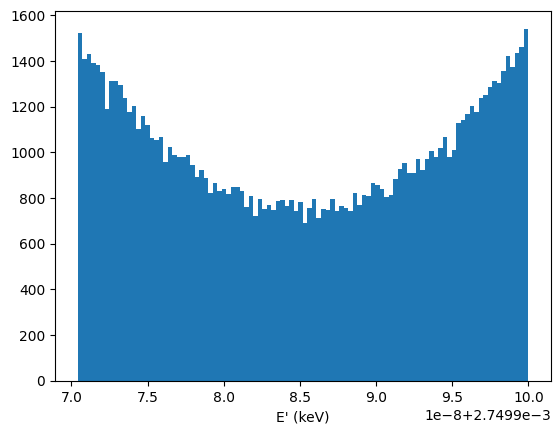

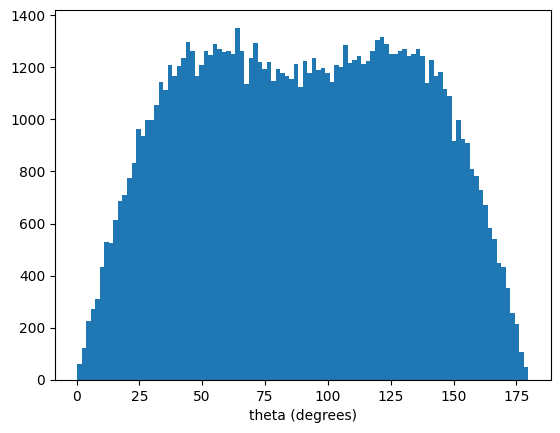

In [6]:
# plots da energia e ângulo
plt.figure()
plt.hist(Eprime*m_e, bins = 100)
plt.xlabel('E\' (keV)')
plt.show()

plt.figure()
#plt.hist(theta_candidates, bins = 100, label = 'theta candidates')
plt.hist(theta, bins = 100, label = 'theta accepted')
plt.xlabel('theta (degrees)')
#plt.legend()
plt.show()